# Titanic con regresión logística

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')  # update this to where your file is located

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Verifica los valores faltantes en cada columna
missing_values = df.isnull().sum()

# Muestra los valores faltantes en cada columna de manera ordenada
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<ipython-input-6-24e558337144>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


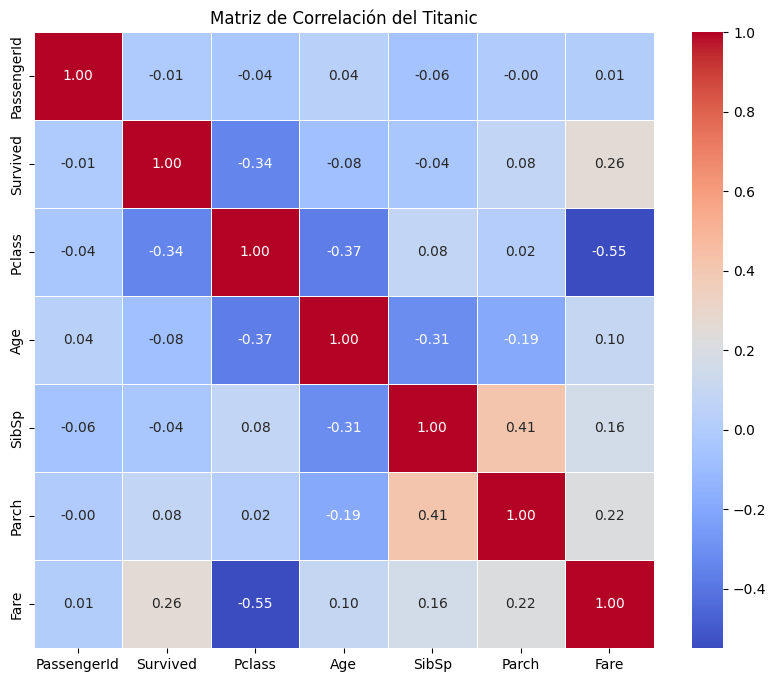

In [ ]:
# Calcula la matriz de correlación
correlation_matrix = df.corr()

# Crea un mapa de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación del Titanic")
plt.show()

0    549
1    342
Name: Survived, dtype: int64


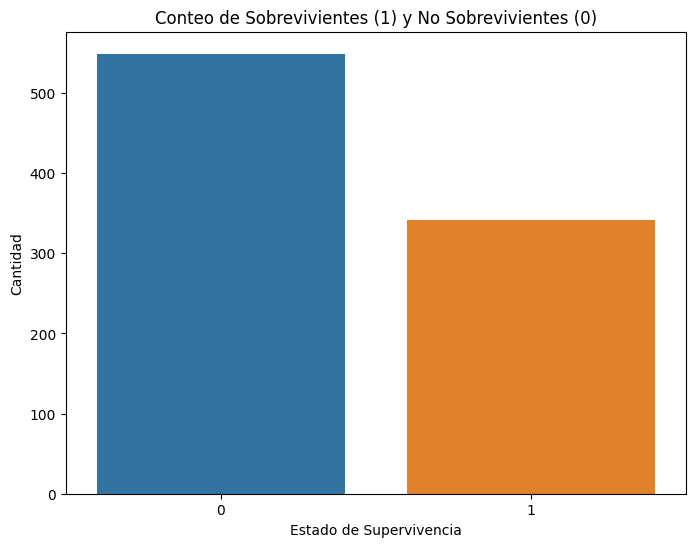

In [ ]:
# Contar los elementos de cada clase en 'Survived'
survived_counts = df['Survived'].value_counts()

print(survived_counts)

# Crear un gráfico de barras utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=survived_counts.index, y=survived_counts.values)
plt.title('Conteo de Sobrevivientes (1) y No Sobrevivientes (0)')
plt.xlabel('Estado de Supervivencia')
plt.ylabel('Cantidad')
plt.show()

In [ ]:
df = df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# Supongamos que 'df' es tu DataFrame del Titanic
# Calcula la media de edad
mean_age = df['Age'].mean()

# Imputa los valores faltantes en 'Age' con la media
df['Age'].fillna(mean_age, inplace=True)

In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report

# Crear un modelo de regresión logística
model = LogisticRegression()

# Realizar la validación cruzada y obtener las predicciones
y_pred = cross_val_predict(model, X, y, cv=5)

# Calcular las métricas de evaluación
confusion = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
recall = recall_score(y, y_pred)
precision = precision_score(y, y_pred)
f1 = f1_score(y, y_pred)
classification_rep = classification_report(y, y_pred)

# Mostrar la matriz de confusión
print("Matriz de Confusión:\n", confusion)

# Mostrar las métricas de evaluación
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

# Mostrar el informe de clasificación por clase
print("Informe de Clasificación:\n", classification_rep)


Matriz de Confusión:
 [[465  84]
 [104 238]]
Accuracy: 0.7890011223344556
Recall: 0.695906432748538
Precision: 0.7391304347826086
F1 Score: 0.716867469879518
Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       549
           1       0.74      0.70      0.72       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.77       891
weighted avg       0.79      0.79      0.79       891



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c